# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import statistics as stat

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.info() #The City and State columns are objects and the Temperature are floats number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [5]:
NY=temp.loc[temp.State=='New York']
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
mean_NY=temp.loc[temp.State=='New York'].mean()
mean_NY

<ipython-input-6-ab4ae31b9b02>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_NY=temp.loc[temp.State=='New York'].mean()


Temperature    10.740741
dtype: float64

In [7]:
np.array(NY.Temperature).mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
temp15=temp[(temp["Temperature"]>15)]
temp15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
temp15=temp[(temp["Temperature"]>15)]
City=temp15['City']
list(City)

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
temp3=temp[(temp["Temperature"]>15)&(temp["Temperature"]<20)]
list(temp3.City)

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
states_dv=temp.groupby(['State']).agg({"Temperature":"std"}).rename(columns={"Temperature":"Temperature_std"})
states_dv

,Temperature_std
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


In [12]:
states_mean=temp.groupby(['State']).agg({"Temperature":"mean"}).rename(columns={"Temperature":"Temperature_mean"})
states_mean

,Temperature_mean
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
%matplotlib inline  
import pylab as plt
plt.rcParams['figure.figsize']=(15,8) 
import seaborn as sns  

In [14]:
employee=pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [15]:
employee.info() #All the columns are objects, except Years and Salary that have integers as values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

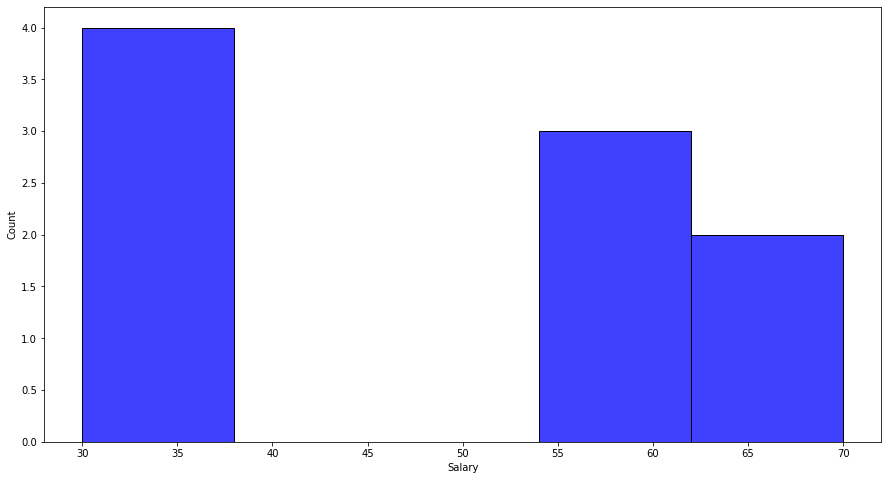

In [16]:
sns.histplot(x=employee.Salary, color='b'); #The only information that we can use in the histogram is the salary, 
#where we can see there is a huge difference between two groups. 

#### What's the average salary in this company?

In [17]:
avg=employee.Salary.mean()
avg

48.888888888888886

In [18]:
np.array(employee.Salary).mean()

48.888888888888886

#### What's the highest salary?

In [19]:
max_salary=max(employee.Salary)
max_salary

70

#### What's the lowest salary?

In [20]:
min_salary=min(employee.Salary)
min_salary

30

#### Who are the employees with the lowest salary?

In [21]:
emp_low=employee.loc[(employee.Salary==min(employee.Salary))]
emp_low

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
list(emp_low.Name)

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [23]:
David=employee.iloc[[2]]
David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


In [24]:
David2=employee.iloc[:,2] #dame la tercera columna con todas sus filas (guardar apuntes)

#### Could you give only David's salary?

In [25]:
list(David.Salary)

[30]

#### Print all the rows where job title is associate

In [26]:
associate=employee.loc[employee.Title=='associate']
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [27]:
first_r=employee.head(3)
first_r

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [28]:
first_ro=employee.iloc[:3]
first_ro

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [29]:
emp55=employee.loc[employee.Title=='associate'].loc[employee.Salary>55]
emp55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [30]:
g_employees=employee.groupby(['Years']).agg({"Salary":"mean"}).rename(columns={"Salary":"avg_Salary"})
g_employees

,avg_Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [31]:
g_title=employee.groupby(['Title']).agg({"Salary":"mean"}).rename(columns={"Salary":"avg_Salary"})
g_title

,avg_Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

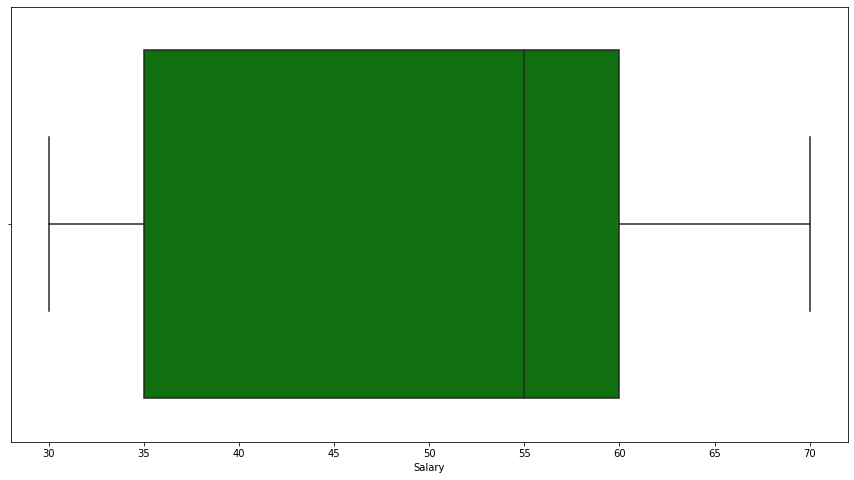

In [32]:
sns.boxplot(x=employee.Salary, color='g');

In [33]:
stats=employee.describe().T

stats['IQR']=stats['75%']-stats['25%']
stats['IQR1.5']=1.5*stats['IQR']+stats['75%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0,5.0,14.5
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0,25.0,97.5


In [34]:
np.quantile(employee.Salary, 0.25) #Q1 - first quartile (25% of the data)

35.0

In [35]:
np.quantile(employee.Salary, 0.5) #Q2 -second quartile / Median (50% of the data)

55.0

In [36]:
np.quantile(employee.Salary, 0.75) #Q3 -third quartile (75% of the data)

60.0

#### Is the mean salary per gender different?

In [37]:
g_gender=employee.groupby(['Gender']).agg({"Salary":"mean"}).rename(columns={"Salary":"avg_Salary"})
g_gender #Yes, mean for Females is lower

,avg_Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [38]:
employee.head(5)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [39]:
gmean=employee.groupby(['Department']).mean()
gmean

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [40]:
g_max=employee.groupby(['Department']).max()
g_max

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


In [41]:
g_min=employee.groupby(['Department']).min()
g_min

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


In [42]:
stats3=employee.describe().iloc[[1, 3, 7],:2]
stats3

,Years,Salary
mean,4.111111,48.888889
min,1.000000,30.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [101]:
g_gender=employee.groupby(['Department']).agg({"Salary":[np.max,np.min]}).rename(columns={"amax":"max","amin":"min"})
g_gender

Salary    
              max min
Department           
HR             70  30
IT             70  30
Sales          55  55

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [45]:
orders=pd.read_csv('Orders.zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [46]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [47]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [48]:
avg_price=orders.UnitPrice.mean()
avg_price

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [49]:
max_price=orders.UnitPrice.max()
max_price

8142.75

In [50]:
min_price=orders.UnitPrice.min()
min_price

0.0

#### Select all the customers we have in Spain

In [61]:
Spain=orders.loc[orders.Country=='Spain']
Spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [52]:
len(set(Spain.CustomerID))

30

In [53]:
len(Spain.CustomerID.unique())

30

#### Select all the customers who have bought more than 50 items ?

In [54]:
customers=orders.loc[orders.Quantity>50]
customers.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [55]:
Spain_orders=orders.loc[orders.Country=='Spain'].loc[orders.Quantity>50]
Spain_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [56]:
Free_orders=orders.loc[orders.amount_spent==0]
Free_orders.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [57]:
orders[(orders.Description.str.contains('lunch bag'))].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [58]:
orders[(orders.Description.str.contains('lunch bag')) & (orders.year==2011)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

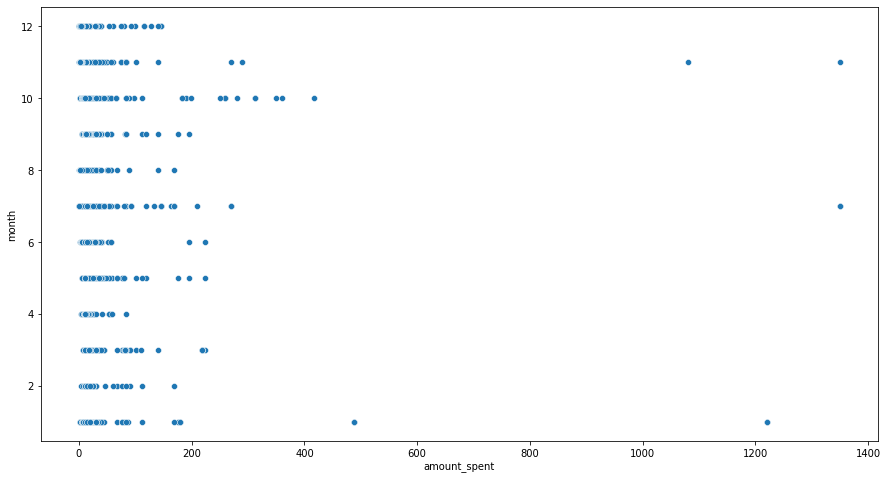

In [93]:
sns.scatterplot(data=Spain, x="amount_spent", y="month");

#### Select all orders made in the month of August

In [81]:
Aug_orders=orders.loc[orders.month==8]
Aug_orders.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [82]:
Aug_counts2=Aug_orders.groupby(["Country"]).agg({"Description":"count"}).rename(columns={"Description":"Qty_country"})
Aug_counts2

,Qty_country
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [89]:
money=orders.groupby(["Country"]).agg({"amount_spent":"mean"}).rename(columns={"amount_spent":"amount_spent_mean"})
money.head()

,amount_spent_mean
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


#### What's the most expensive item?

In [87]:
expensive=orders.groupby(["Description"]).agg({"UnitPrice":"max"}).rename(columns={"UnitPrice":"most_expensive"})
expensive.sort_values(by='most_expensive',ascending=False).head(1)

,most_expensive
Description,
postage,8142.75


#### What was the average amount spent per year ?

In [88]:
amount=orders.groupby(["year"]).agg({"amount_spent":"mean"}).rename(columns={"amount_spent":"year_mean"})
amount

,year_mean
year,
2010,21.892733
2011,22.430074
